In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Karnataka1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,20,0,0,0,18,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,18,0,0,0,0,0,0,0
131397,2014,12,31,21,0,19,0,0,0,18,0,0,0,0,0,0,0
131398,2014,12,31,22,0,19,0,0,0,18,0,0,0,0,0,0,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110,2000-01-01 02:00:00
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343,2000-01-01 03:00:00
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554,2000-01-01 04:00:00
5,2000,1,1,5,0,23,153,821,718,14,153,129,821,859,0,718,721,2000-01-01 05:00:00
6,2000,1,1,6,0,24,162,856,822,14,162,160,856,861,0,822,825,2000-01-01 06:00:00
7,2000,1,1,7,0,25,164,863,852,14,258,258,677,677,0,798,798,2000-01-01 07:00:00
8,2000,1,1,8,0,25,160,847,804,14,192,192,769,769,0,777,777,2000-01-01 08:00:00
9,2000,1,1,9,0,25,150,803,685,15,150,147,803,819,0,685,693,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,231.1
2000-01-02,235.1
2000-01-03,228.3
2000-01-04,234.0
2000-01-05,235.3
...,...
2014-12-27,217.0
2014-12-28,161.8
2014-12-29,183.2


In [8]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,234.371429
2000-01-14,229.814286
2000-01-21,253.528571
2000-01-28,263.842857
2000-02-04,282.085714
...,...
2014-12-05,203.614286
2014-12-12,175.657143
2014-12-19,148.700000


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-07,234.371429
2000-01-14,229.814286
2000-01-21,253.528571
2000-01-28,263.842857
2000-02-04,282.085714
...,...
2011-12-02,146.985714
2011-12-09,188.671429
2011-12-16,197.128571


In [10]:
y[:4382]

,GHI
Date,
2000-01-01,231.1
2000-01-02,235.1
2000-01-03,228.3
2000-01-04,234.0
2000-01-05,235.3
...,...
2011-12-29,216.1
2011-12-30,72.1
2011-12-31,97.1


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [14]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [15]:
X_T[:626]

array([[231.1, 235.1, 228.3, ..., 235.3, 236.4, 240.4],
       [241.4, 242. , 240.4, ..., 205.5, 230.7, 241.7],
       [240.1, 247.5, 253.5, ..., 258.3, 259.2, 263.2],
       ...,
       [211.1, 210.6, 171.8, ..., 212.7, 216.7, 197.3],
       [194.5, 217.8, 193.3, ..., 219.2, 222.4, 217. ],
       [175.3, 224.1, 216.1, ...,  97.1, 224.4, 235.2]])

In [16]:
Y_T[:626].shape

(626,)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

X_T=X_T.reshape(X_T.shape[0],X_T.shape[1],1)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7,1))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[231.62988]]
[[228.96405]]
[[256.21698]]
[[262.0024]]
[[270.4354]]
[[249.54149]]
[[282.39554]]
[[292.19547]]
[[289.81134]]
[[288.17773]]
[[274.2618]]
[[293.87668]]
[[300.1049]]
[[283.16757]]
[[276.66998]]
[[275.01675]]
[[227.84744]]
[[280.65338]]
[[260.9481]]
[[263.88736]]
[[236.09727]]
[[276.29266]]
[[256.20856]]
[[206.05652]]
[[253.03375]]
[[244.5452]]
[[229.0438]]
[[249.52013]]
[[200.38127]]
[[228.10954]]
[[206.09825]]
[[232.76639]]
[[274.00348]]
[[214.44827]]
[[226.88312]]
[[214.47916]]
[[243.29427]]
[[244.49588]]
[[233.21901]]
[[231.29706]]
[[241.04202]]
[[183.86713]]
[[210.64108]]
[[135.49748]]
[[208.94449]]
[[212.11523]]
[[174.19456]]
[[204.88144]]
[[174.05711]]
[[206.98152]]
[[211.50464]]
[[175.84473]]
[[218.89091]]
[[245.10239]]
[[254.32419]]
[[263.98727]]
[[268.18842]]
[[243.79492]]
[[221.1447]]
[[297.0861]]
[[300.12103]]
[[224.11351]]
[[296.19626]]
[[296.98492]]
[[292.07562]]
[[288.02698]]
[[291.75812]]
[[292.7879]]
[[246.61511]]
[[273.51263]]
[[275.5831]]
[[260.80344]]
[[2

[array([[231.62988]], dtype=float32),
 array([[228.96405]], dtype=float32),
 array([[256.21698]], dtype=float32),
 array([[262.0024]], dtype=float32),
 array([[270.4354]], dtype=float32),
 array([[249.54149]], dtype=float32),
 array([[282.39554]], dtype=float32),
 array([[292.19547]], dtype=float32),
 array([[289.81134]], dtype=float32),
 array([[288.17773]], dtype=float32),
 array([[274.2618]], dtype=float32),
 array([[293.87668]], dtype=float32),
 array([[300.1049]], dtype=float32),
 array([[283.16757]], dtype=float32),
 array([[276.66998]], dtype=float32),
 array([[275.01675]], dtype=float32),
 array([[227.84744]], dtype=float32),
 array([[280.65338]], dtype=float32),
 array([[260.9481]], dtype=float32),
 array([[263.88736]], dtype=float32),
 array([[236.09727]], dtype=float32),
 array([[276.29266]], dtype=float32),
 array([[256.20856]], dtype=float32),
 array([[206.05652]], dtype=float32),
 array([[253.03375]], dtype=float32),
 array([[244.5452]], dtype=float32),
 array([[229.0438]

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

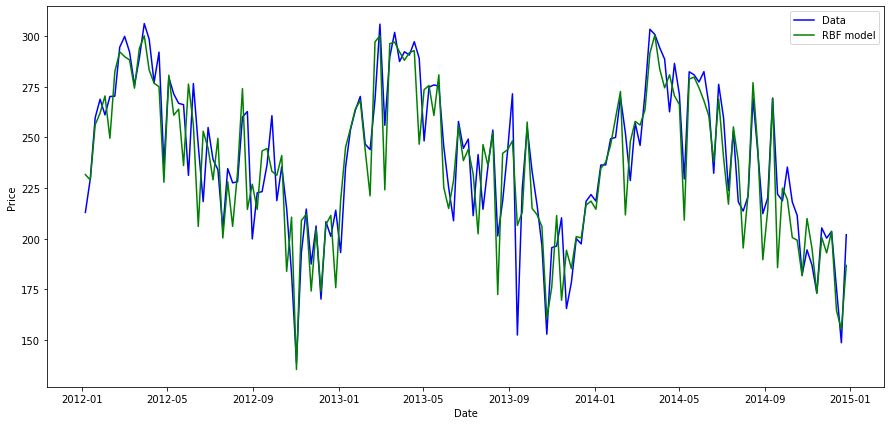

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
df1 = pd.DataFrame(columns=['Date','GHI'])
df1['Date'] = y_w[626:-1].index
df1['GHI'] = np.asarray(yhat).reshape(156,)
df1.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Karnataka1/LSTMweekly.csv')

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False)

16.96877734210401

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,))

0.054146318875105605